In [4]:
 !pip install matplotlib


    100% |████████████████████████████████| 12.8MB 107kB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 4.7MB/s ta 0:00:011


                                     id  frequency  recency   t
0  00913d54-7312-4888-9b8f-59d35d692e43          2        2  16
1  00c698ef-ca03-4103-aeca-ae938381a9ff         11       21  27
2  00cc178a-5c90-4815-a7e0-e7f4d984da86          0        0  38
3  015b876c-5991-4f51-9b8e-e2ad87ce3752          0        0  27
4  019c70c2-afc5-468b-9f19-f5865760e8b0         12       28  29
<lifetimes.BetaGeoFitter: fitted with 28628 subjects, a: 0.77, alpha: 1.07, b: 4.20, r: 0.22>


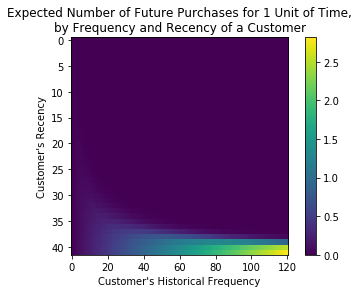

In [69]:
%matplotlib inline
from lifetimes import BetaGeoFitter
from lifetimes.datasets import load_cdnow
from lifetimes.plotting import plot_frequency_recency_matrix,plot_probability_alive_matrix
import pandas as pd
data = pd.read_csv('~/data_work/nbd_data.csv',sep=',')

print(data.head())
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['t'])
print(bgf)
plot_frequency_recency_matrix(bgf)




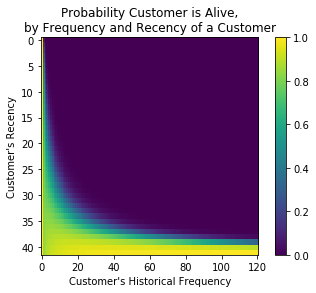

In [70]:
plot_probability_alive_matrix(bgf)

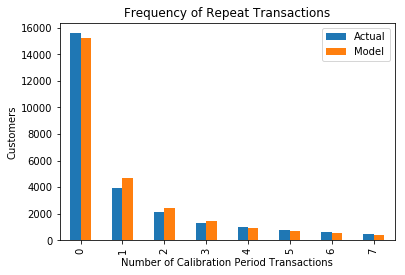

In [71]:
plot_period_transactions(bgf)

In [83]:
x=bgf.conditional_expected_number_of_purchases_up_to_time(4,data['frequency'],data['recency'],data['t'])

x.rename("purches in next 4 weeks")
result=pd.concat([data,x],axis=1)
print(result)

                                         id  frequency  recency   t         0
0      00913d54-7312-4888-9b8f-59d35d692e43          2        2  16  0.065313
1      00c698ef-ca03-4103-aeca-ae938381a9ff         11       21  27  0.850657
2      00cc178a-5c90-4815-a7e0-e7f4d984da86          0        0  38  0.022019
3      015b876c-5991-4f51-9b8e-e2ad87ce3752          0        0  27  0.030537
4      019c70c2-afc5-468b-9f19-f5865760e8b0         12       28  29  1.452845
5      0271d18d-0744-4c79-bdbb-63d33f5fa475          0        0  35  0.023832
6      063b860e-0111-4b15-82a0-95b6976fd5a9          0        0  10  0.075976
7      06b4e4db-be5b-4467-8493-175d7117727c          0        0  39  0.021475
8      0cfe3c0c-980e-4055-9875-506ccd8f5505          0        0  37  0.022592
9      0f39768f-d42c-4de1-82ac-2413e9c1af9f          0        0   5  0.135275
10     0f5307fa-19cd-40eb-828e-9d1f496612d3          5        6  30  0.003055
11     184a8113-7b02-4afb-8a53-e458c0c376df          0        0 

In [78]:
bgf.conditional_expected_number_of_purchases_up_to_time?